## **Feed Forward Neural Network for Image Classification on the MNIST dataset**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Print shape of x_train, y_train, x_test, y_test
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


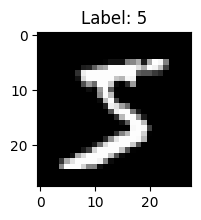

In [4]:
# Lets plot the 0th image and print its label
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[0], cmap='gray')
plt.title('Label: {}'.format(y_train[0]))
plt.show()

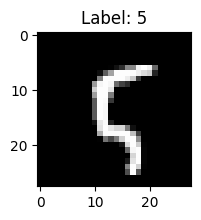

In [5]:
# Lets plot the 100th image and print its label
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[100], cmap='gray')
plt.title('Label: {}'.format(y_train[100]))
plt.show()

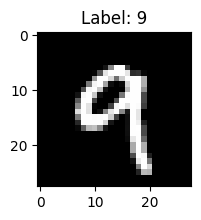

In [6]:
# Lets plot the 110th image and print its label
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[110], cmap='gray')
plt.title('Label: {}'.format(y_train[110]))
plt.show()

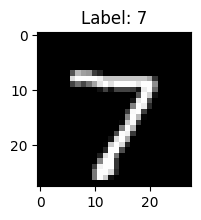

In [7]:
# Lets plot the 0th image and print its label
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_test[0], cmap='gray')
plt.title('Label: {}'.format(y_test[0]))
plt.show()

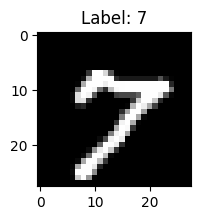

In [8]:
# Lets plot the 9000th image and print its label
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_test[9000], cmap='gray')
plt.title('Label: {}'.format(y_test[9000]))
plt.show()

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0

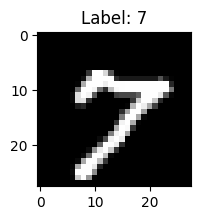

In [11]:
# Lets plot the 9000th image and print its label
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_test[9000], cmap='gray')
plt.title('Label: {}'.format(y_test[9000]))
plt.show()

In [12]:
28*28

784

In [13]:
# Build/Instantiate the model
# model = tf.keras.models.Sequential([
#   tf.keras.Input(shape=(28, 28)),
#     tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

initializer = tf.keras.initializers.GlorotNormal()

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='elu', kernel_initializer=initializer),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
# Compile the compile
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

opt = tf.keras.optimizers.SGD(
    learning_rate=0.001,
    momentum=0.001,
)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
0.3236 - 0.3138

0.009799999999999975

In [16]:
# Train the model
# r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, min_delta=0.009)
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, callbacks=[callback])

Epoch 1/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3078 - loss: 2.0780 - val_accuracy: 0.7715 - val_loss: 1.2323
Epoch 2/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7158 - loss: 1.1673 - val_accuracy: 0.8364 - val_loss: 0.7191
Epoch 3/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7894 - loss: 0.7834 - val_accuracy: 0.8634 - val_loss: 0.5439
Epoch 4/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8219 - loss: 0.6300 - val_accuracy: 0.8768 - val_loss: 0.4621
Epoch 5/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8401 - loss: 0.5560 - val_accuracy: 0.8852 - val_loss: 0.4162
Epoch 6/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8540 - loss: 0.5054 - val_accuracy: 0.8937 - val_loss: 0.3854
Epoch 7/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.4784 - val_accuracy: 0.8979 - val_loss: 0.3648
Epoch 8/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8714 - loss: 0

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,150 (1.04 MB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,076 (531.55 KB)

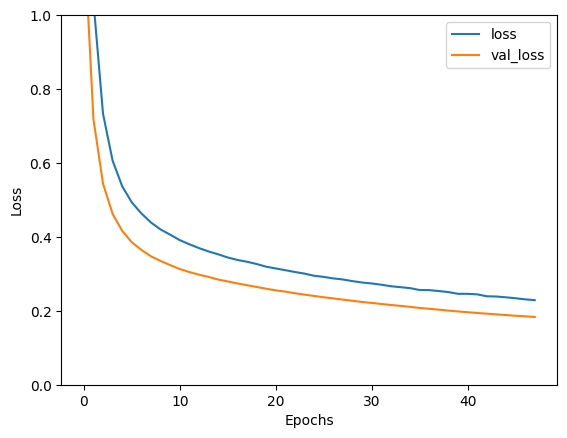

In [18]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.show()

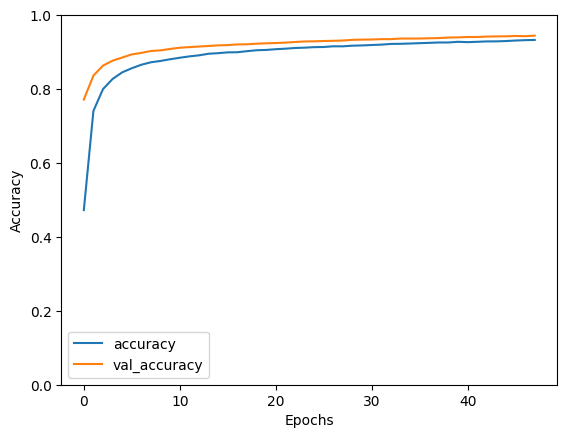

In [19]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.show()

In [20]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.5044461e-05, 4.2307664e-07, 5.8431819e-04, ..., 9.9787283e-01,
        2.6420903e-05, 2.4975062e-04],
       [6.0402957e-04, 1.1121941e-04, 9.7346401e-01, ..., 2.5739402e-07,
        2.4442488e-04, 7.5700626e-08],
       [2.4946756e-05, 9.8771697e-01, 4.0124571e-03, ..., 2.8508848e-03,
        1.7078957e-03, 3.5084059e-04],
       ...,
       [4.7186501e-07, 5.8773685e-07, 2.0870943e-05, ..., 2.1531842e-04,
        6.2236644e-04, 6.1665326e-03],
       [1.4447611e-03, 9.6246193e-04, 1.2019707e-04, ..., 6.0243743e-05,
        6.4039357e-02, 6.4461587e-05],
       [3.9375522e-05, 2.7395357e-08, 1.9421571e-04, ..., 5.1143012e-08,
        1.6351964e-06, 8.6950956e-07]], dtype=float32)

In [21]:
p_test = model.predict(x_test).argmax(axis=1)
p_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, p_test)
cm

array([[ 964,    0,    0,    1,    0,    3,    8,    2,    2,    0],
       [   0, 1116,    3,    2,    1,    0,    3,    2,    8,    0],
       [  11,    3,  956,   11,   10,    1,   11,   10,   17,    2],
       [   0,    0,   15,  952,    0,   17,    1,   13,   10,    2],
       [   1,    2,    5,    0,  931,    0,   11,    2,    3,   27],
       [  10,    1,    0,   29,    6,  806,   13,    4,   15,    8],
       [  10,    3,    1,    2,   10,    7,  922,    1,    2,    0],
       [   1,   12,   18,    6,    5,    0,    0,  967,    1,   18],
       [   5,    8,    4,   16,   11,   12,   11,    9,  895,    3],
       [  11,    7,    1,   10,   26,    4,    1,    9,    4,  936]],
      dtype=int64)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix, without normalization


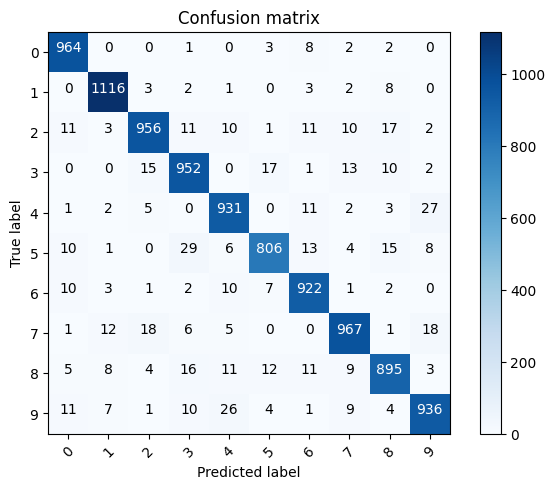

In [23]:
# Plot confusion matrix
# Kindly dont focus on the details of implementation of the code below
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  # print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

In [24]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
misclassified_idx

array([   8,   33,  124,  149,  211,  217,  233,  241,  247,  259,  290,
        300,  313,  320,  321,  340,  341,  352,  362,  381,  412,  445,
        448,  449,  478,  479,  495,  502,  507,  511,  531,  543,  551,
        565,  569,  578,  582,  591,  610,  619,  627,  629,  659,  684,
        691,  707,  717,  720,  740,  760,  791,  839,  844,  881,  924,
        938,  939,  947,  950,  951,  956,  959,  965, 1003, 1012, 1014,
       1032, 1039, 1044, 1062, 1068, 1073, 1082, 1096, 1101, 1107, 1112,
       1114, 1119, 1181, 1191, 1192, 1194, 1198, 1204, 1224, 1226, 1228,
       1232, 1242, 1247, 1251, 1256, 1260, 1283, 1289, 1299, 1319, 1325,
       1326, 1328, 1337, 1378, 1393, 1410, 1433, 1440, 1444, 1466, 1467,
       1500, 1522, 1525, 1527, 1530, 1549, 1553, 1569, 1581, 1609, 1621,
       1634, 1640, 1671, 1678, 1681, 1696, 1709, 1717, 1722, 1751, 1754,
       1773, 1790, 1800, 1813, 1828, 1850, 1857, 1868, 1878, 1901, 1911,
       1917, 1938, 1940, 1941, 1952, 1970, 1973, 19

In [25]:
len(misclassified_idx)

555

In [26]:
226/10000

0.0226

In [27]:
accy = 1 - 0.0226
accy

0.9774

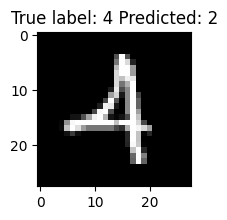

In [28]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(2,2))
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
plt.show()

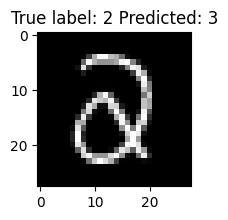

In [29]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(2,2))
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
plt.show()

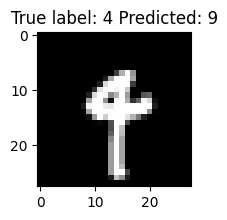

In [30]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(2,2))
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
plt.show()

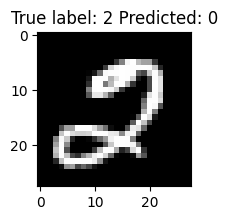

In [31]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(2,2))
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
plt.show()

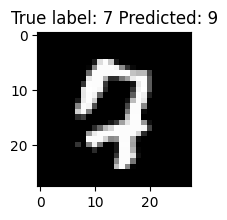

In [32]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(2,2))
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
plt.show()

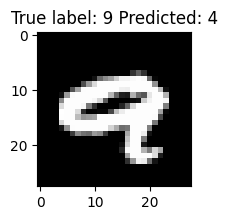

In [33]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(2,2))
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
plt.show()

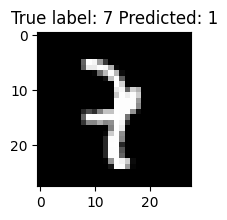

In [34]:
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(2,2))
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
plt.show()

## Tips for creating Neural Networks

Deep learning can feel overwhelming with all its parameters and configurations, but understanding the core principles and following a structured approach can make it manageable. Let's break down your questions systematically while focusing on practical guidance.

---

### **1. How to Choose the Right Number of Hidden Layers?**
- **Approach:**
  - Start with **one hidden layer** for simpler problems. For example:
    - If the task is linear (like predicting a straight-line relationship), fewer layers suffice.
  - For more complex problems (e.g., image recognition, natural language processing), start with **2–3 hidden layers** and adjust based on performance.
  - Use more layers if the data has hierarchical patterns (e.g., images where edges → shapes → objects).

- **Guiding Tip:** Start simple and add layers if the model underfits (fails to capture patterns). Too many layers can lead to overfitting.

---

### **2. How to Choose the Number of Neurons in Each Hidden Layer?**
- **Approach:**
  - Start with the **rule of thumb:** Number of neurons ≈ \( \frac{\text{number of input features + output features}}{2} \).
  - Experiment with **powers of 2** (e.g., 16, 32, 64) for layers and monitor performance.
  - For deeper layers, reduce the number of neurons (e.g., 128 → 64 → 32).

- **Practical Advice:**
  - Avoid excessive neurons; it increases computation without necessarily improving performance.
  - Use **grid search** or **random search** for fine-tuning the number of neurons.

---

### **3. How to Choose the Number of Neurons in the Output Layer?**
- **Directly dependent on the problem type:**
  - **Regression tasks:** One neuron (for continuous output, e.g., house price prediction).
  - **Binary classification:** One neuron with a sigmoid activation.
  - **Multi-class classification:** Number of neurons = Number of classes (e.g., 10 neurons for MNIST digits).

---

### **4. How to Choose Activation Functions?**
- **Hidden Layers:**
  - Use **ReLU (Rectified Linear Unit)**: It’s the default for most problems due to simplicity and efficiency.
  - Use **Leaky ReLU** or **ELU** if ReLU causes dead neurons (where the output is always 0).
  - Avoid **Sigmoid** or **Tanh** in hidden layers for deep networks as they can lead to vanishing gradients.

- **Output Layer:**
  - **Regression:** Use no activation function or linear activation.
  - **Binary Classification:** Use **sigmoid** (outputs probabilities between 0 and 1).
  - **Multi-class Classification:** Use **softmax** (outputs probabilities across multiple classes).

- **Order to Follow:**
  - Start with ReLU for hidden layers.
  - Choose the output activation based on the task (regression/classification).

---

### **5. How to Choose the Right Loss Function?**
- Match it to the task:
  - **Regression:** Mean Squared Error (MSE) or Mean Absolute Error (MAE).
  - **Binary Classification:** Binary Crossentropy.
  - **Multi-class Classification:** Categorical Crossentropy (one-hot labels) or Sparse Categorical Crossentropy (integer labels).

- **Guiding Tip:** The choice of loss function depends on the problem output (continuous or categorical).

---

### **6. How to Choose the Right Dropout?**
- Dropout prevents overfitting by randomly "dropping out" neurons during training.
  - Typical values: **0.2–0.5** (20–50% dropout).
  - For large networks, use **higher dropout (e.g., 0.4–0.5)**; for smaller networks, use **lower dropout (e.g., 0.1–0.3).**
  - Apply dropout in **hidden layers only**, not the input or output layer.

---

### **7. How to Choose the Right Parameter Configuration for Early Stopping?**
- Early stopping halts training when performance stops improving to avoid overfitting.
  - Monitor the **validation loss** or accuracy.
  - Common patience value: **5–10 epochs** (i.e., stop if no improvement for 5–10 consecutive epochs).

---

### **Approach for Solving Any Business Problem with Neural Networks**
1. **Understand the Problem:**
   - Define the goal (classification, regression, clustering).
   - Analyze the data (features, target variable, size).

2. **Prepare Data:**
   - Normalize or scale data (especially for numerical inputs).
   - Handle missing data and outliers.

3. **Design the Network:**
   - Choose input features (number of neurons = number of features).
   - Start with 1–3 hidden layers with ReLU activation.
   - Define the output layer based on the task.
   - Choose the activation for the output layer.

4. **Compile the Model:**
   - Select an optimizer (e.g., Adam or SGD).
   - Define the loss function based on the task.
   - Set metrics (e.g., accuracy for classification, MAE for regression).

5. **Train and Validate:**
   - Split the data into training, validation, and test sets.
   - Train the model with a small batch size (e.g., 32–64).
   - Use early stopping to prevent overfitting.

6. **Evaluate and Tune:**
   - Check performance on the test set.
   - Adjust hidden layers, neurons, activation functions, and dropout based on results.

---

### **Additional Tips You Must Know**
1. **Batch Size:** Start with 32 or 64. Larger datasets may benefit from higher batch sizes.
2. **Epochs:** Use **10–100 epochs**, monitor validation loss, and stop early if performance saturates.
3. **Learning Rate:** Start with a small value (e.g., 0.001) and tune if training is unstable.
4. **Feature Engineering:** Quality inputs often matter more than complex architectures.

---

### Summary Workflow
1. **Start simple:** Few layers, ReLU activation, common loss functions.
2. **Experiment and iterate:** Adjust based on training/validation performance.
3. **Avoid overfitting:** Use dropout, early stopping, and validation data.

---



# Happy Learning